In [3]:
import pandas as pd
import numpy as np

In [11]:
df = pd.DataFrame({'item': [1, 2, 3, 1, 2, 'nan',1,2,4,5],
                   'date': ['01', 2, '01', 4, 2, 3,4,5,6,7],
                   'sales': [10,20,30,40,50,60,70,80,90,11]}, columns=['item','date','sales'])
df

,item,date,sales
0,1,01,10
1,2,2,20
2,3,01,30
3,1,4,40
4,2,2,50
5,nan,3,60
6,1,4,70
7,2,5,80
8,4,6,90
9,5,7,11


In [12]:
df['date']=df['date'].astype('int')

In [6]:
df.sort_values(by ='date', ascending = 1)
# a = df.sort_values(by ='Science', ascending = 0)
# Sort the dataframe’s rows by Maths
# and then by English, in ascending order
# b = df.sort_values(by =['Maths', 'English'])
# a = df.sort_values(by ='Science', na_position ='first' )
# DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

,item,date,sales
0,1,1,10
2,3,1,30
1,2,2,20
4,2,2,50
5,3,3,60
3,1,4,40
6,1,4,70
7,2,5,80
8,4,6,90
9,5,7,11


In [ ]:
df.info()

In [234]:
df[df['date']==2]

,item,date,sales
1,2,2,20
4,2,2,50


In [155]:
df[(0 <= df['date']) & (df['date'] < 3)]

,item,date,sales
0,1,1,10
1,2,2,20
2,3,1,30
4,2,2,50


In [ ]:
df['date'].between(1, 3, inclusive=False)

In [156]:
df1 = df[(0 <= df['date']) & (df['date'] < 3)].aggregate({'item':['sum']})
df1

,item
sum,8


In [157]:
df1['month']='01'

In [158]:
df1

,item,month
sum,8,01


In [ ]:
# It will check the string length of 3. If it less then add 0 infront of the value.
df['month']=df['month'].apply(lambda x: '{0:0>3}'.format(x))
df1.month.unique()

In [235]:
df1['month'] = df1['month'].str.replace('0', '')
# df1['month'] = df1['month'].astype(int).astype(str)
df1

,item,month
sum,8,1


In [ ]:
# dropping a row 'c' & 'd' from actual dataframe
df.drop(['0', '1'], inplace = True )

In [293]:
# For droping all the rows
df_new3=pd.DataFrame()
df_new3

""


In [13]:
df.item.value_counts()

2      3
1      3
5      1
4      1
nan    1
3      1
Name: item, dtype: int64

In [14]:
df.item.unique()

array([1, 2, 3, 'nan', 4, 5], dtype=object)

In [7]:
df

,item,date,sales
0,1,1,10
1,2,2,20
2,3,1,30
3,1,4,40
4,2,2,50
5,3,3,60
6,1,4,70
7,2,5,80
8,4,6,90
9,5,7,11


In [266]:
df2 = df.groupby(['date']).agg({'item': ['sum'],'sales': ['sum']}).reset_index()
#rename columns 
df2.columns = ['date', 'item_sum', 'sales_sum']
df2
# data.groupby('month', as_index=False).agg({"duration": "sum"}) )

,date,item_sum,sales_sum
0,1,4,40
1,2,4,70
2,3,3,60
3,4,2,110
4,5,2,80
5,6,4,90
6,7,5,11


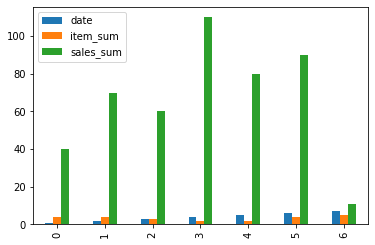

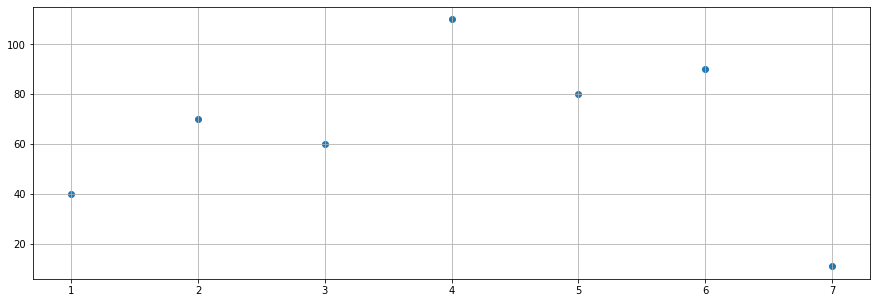

In [291]:
import matplotlib.pyplot as plt
df2.plot(kind='bar')
plt.figure(figsize=(15,5))
plt.grid()
plt.scatter(df2.date,df2.sales_sum)

In [267]:
df2.columns

Index(['date', 'item_sum', 'sales_sum'], dtype='object')

In [1]:
df

NameError: ignored

In [294]:
def items_sold(monthno,itemno):
  print('month is :',monthno)
  print('item is :',itemno)
  df_new = df[(df['date']==monthno) & (df['item']==itemno)].aggregate({'item':['sum'],'sales':['sum']})
  df_new['item_sum']=df_new['item']
  df_new['monthval']=monthno
  df_new = pd.concat([df_new,df_new3])
  return df_new
for mon in range(1,13):
  for itemnum in range(1,3):
    df_new3 = items_sold(mon,itemnum)
#df_new3
df_new3.sort_values(by ='monthval', ascending = 1)
#  print(mon)
#  df_new3 = items_sold(mon,1)
#df_new3


month is : 1
item is : 1
month is : 1
item is : 2
month is : 2
item is : 1
month is : 2
item is : 2
month is : 3
item is : 1
month is : 3
item is : 2
month is : 4
item is : 1
month is : 4
item is : 2
month is : 5
item is : 1
month is : 5
item is : 2
month is : 6
item is : 1
month is : 6
item is : 2
month is : 7
item is : 1
month is : 7
item is : 2
month is : 8
item is : 1
month is : 8
item is : 2
month is : 9
item is : 1
month is : 9
item is : 2
month is : 10
item is : 1
month is : 10
item is : 2
month is : 11
item is : 1
month is : 11
item is : 2
month is : 12
item is : 1
month is : 12
item is : 2


,item,sales,item_sum,monthval
sum,1,10,1,1
sum,0,0,0,1
sum,0,0,0,2
sum,4,70,4,2
sum,0,0,0,3
sum,0,0,0,3
sum,2,110,2,4
sum,0,0,0,4
sum,0,0,0,5
sum,2,80,2,5


In [170]:
def items_sold(monthno,itemno):
  print('month is :',monthno)
  df_new = df[df['date']==monthno].aggregate({'item':['sum']})
  df_new['item_sum']=df_new['item']
  df_new['monthval']=monthno
  df_new = pd.concat([df_new,df_new1])
  return df_new  

#  df_new = df[(0 <= df['date']) & (df['date'] < 3)].aggregate({'item':['sum']})
data=df[df['date']==2].date.values
data=data[0]
# items_sold(data,1)
df_new1 = items_sold(data,1)
df_new1

month is : 2


,item,item_sum,monthval
sum,4,4,2
sum,1,1,4
sum,3,3,3
sum,4,4,3
sum,4,4,1
sum,4,4,2
sum,4,4,2
sum,4,4,2


In [ ]:
df_new1[['item_sum', 'monthval']]

In [189]:
#df2 = df[df['date']==1].aggregate({'item':['sum']})
#df2 = df.agg("mean", axis="columns")
df3 = df[df['date']==1].agg("sum", axis="index")[['item','sales']]
df3

item      4
sales    40
dtype: int64

In [192]:
df4 = df[df['date']==2].aggregate({'item':['sum'],'sales':['sum']})
df4

,item,sales
sum,4,70


In [ ]:
# Add Padding '0' 
import pandas as pd
nums = {
   'amount': [10, 250, 3000, 40000, 500000]
}
print("Original dataframe:")
df = pd.DataFrame(nums)
print(df)
print("\nAdd leading zeros:")
df['amount'] = df['amount'].apply(lambda x: '{0:0>8}'.format(x))
print(df)

# Add Padding '0' 
df = pd.DataFrame({'col':['100','200','00153','00164']})
df['final_col'] = df.col.astype(str).str.pad(5, fillchar='0')
df

In [ ]:
# Remove Padding '0' 
data = pd.DataFrame(
    data = [['bob','39384954.0'],['Lina','23827484.0']], 
    columns = ['user','phone'], index = [1,2]
)

data['phone'] = data['phone'].astype(str)
data['phone'] = data['phone'].str.replace('.0', ' ')
print data

   user     phone
1   bob  39384954
2  Lina  23827484

In [ ]:
# DataType Conversion  
df['Phone'] = df['Phone'].astype(int).astype(str)
df
df['sales'] = df['sales'].astype('float64')

In [ ]:
# Remove Padding '0' 
df = pd.DataFrame({'col1':[1.00, 1, 0.5, 1.50]})

df['new'] = df['col1'].map('{0:g}'.format)
#alternative solution
#df['new'] = df['col1'].apply('{0:g}'.format)
print (df)

In [228]:
df1['month']='010'
#df1['month'] = df1['month'].str.replace('0', '')
df1['month']=[mon.lstrip('0') for mon in df1.month]
df1

,item,month
sum,8,10


In [ ]:
#group by team and position and find mean assists
new = df.groupby(['team', 'position']).agg({'assists': ['mean']}).reset_index()

#rename columns 
new.columns = ['team', 'pos', 'mean_assists']

#view DataFrame
print(new)

	team	pos	mean_assists
0	A	G	5.0
1	B	F	6.0
2	B	G	7.5
3	M	C	7.5
4	M	F	7.0

In [ ]:
import matplotlib.pyplot as plt
ax = df.plot(kind='bar', title ="V comp",figsize=(15,10),legend=True, fontsize=12)
ax.set_xlabel("Hour",fontsize=12)
ax.set_ylabel("V",fontsize=12)
# ax = df[['V1','V2']].plot(kind='bar', title ="V comp", figsize=(15, 10), legend=True, fontsize=12)
# plotdata.plot(kind='bar', stacked=True)
#plt.title("Total Pie Consumption")
#plt.xlabel("Family Member")
#plt.ylabel("Pies Consumed")
# plotdata[["pies_2020", "pies_2018", "pies_2019"]].plot(kind="bar", stacked=True)

In [ ]:
#import pandas as pd
# Load data from csv file
#data = pd.read_csv('phone_data.csv')
print( data.groupby('month', as_index=False).agg({"duration": "sum"}) )
# Group the data frame by month and item and extract a number of stats from each group
aggregations={
               'duration':sum, 
               'network_type': "count",
               'date': 'first'
             }
# get the first date per group                                     
print( data.groupby(['month', 'item']).agg(aggregations) )
import pandas as pd
# Load data from csv file
data = pd.read_csv('phone_data.csv')
grouped = data.groupby('month').agg({'duration': [min, max, sum]})
grouped.columns = grouped.columns.droplevel(level=0)
grouped.rename(columns={"min": "min_duration", "max": "max_duration", "sum": "sum_duration"})
print(grouped.head())

**# Testing Code**

In [93]:
import pandas as pd
import numpy as np
df3=pd.DataFrame({'item': [1, 1, 1, 1, 1, 1,1,1,2,1,1,2,3,4,1],
                   'month': [1, 1, 1, 1, 1, 2,2,2,2,2,3,4,4,7,3],
                   'year': [2013, 2014, 2015, 2016,2017, 2013,2014,2015,2016,2017,2013,2015,2016,2017,2018],
                  'item_sum': [310, 310, 310, 310,310, 280,280,280,290,280,310,100,200,400,300],
                  'sales_sum': [3794, 4323, 4626, 5008,5236, 3863,4391,4633,5160,5299,5190,1111,2222,3333,4444]}, columns=['item','month','year','item_sum','sales_sum'])
df3

,item,month,year,item_sum,sales_sum
0,1,1,2013,310,3794
1,1,1,2014,310,4323
2,1,1,2015,310,4626
3,1,1,2016,310,5008
4,1,1,2017,310,5236
5,1,2,2013,280,3863
6,1,2,2014,280,4391
7,1,2,2015,280,4633
8,2,2,2016,290,5160
9,1,2,2017,280,5299


In [ ]:
# df_new1.drop_duplicates(keep=False,inplace=True)

In [113]:
df_new1=pd.DataFrame()
df_new1

""


In [119]:
def items_sold(yrno,itemno,monthno):

  if(monthno==3):
    df_new = df3[(df3['item']==itemno) & ((1 <= df3['month']) & (df3['month'] < 4)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})
  elif(monthno==6):
    df_new = df3[(df3['item']==itemno) & ((4 <= df3['month']) & (df3['month'] < 7)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})
  elif(monthno==9):
    df_new = df3[(df3['item']==itemno) & ((7 <= df3['month']) & (df3['month'] < 10)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})
  else:
    df_new = df3[(df3['item']==itemno) & ((10 <= df3['month']) & (df3['month'] <= 12)) & (df3['year']==yrno)].aggregate({'item_sum':['sum'],'sales_sum':['sum']})

# df_new['item_sum_new']=df_new['item_sum']
  df_new['year']=yrno
  df_new['itemnum']=itemno
  df_new = pd.concat([df_new,df_new1])
  return df_new

yr_list = df3['year'].unique().tolist()
item_list = df3['item'].unique().tolist()
mon_list = df3['month'].unique().tolist()
for yr in yr_list:
  for item in item_list:
    for mon in mon_list:
      if(mon<=3):
        monthval=3
      elif(mon>3 and mon<=6):
        monthval=6
      elif(mon>6 and mon<=9):
        monthval=9
      else:monthval=12
      df_new1 = items_sold(yr,item,monthval)
df_new1
df_new1.sort_values(by ='year', ascending = 1)

,item_sum,sales_sum,year,itemnum
sum,900,12847,2013,1
sum,0,0,2013,4
sum,0,0,2013,4
sum,0,0,2013,4
sum,0,0,2013,4
...,...,...,...,...
sum,300,4444,2018,1
sum,300,4444,2018,1
sum,300,4444,2018,1
sum,0,0,2018,2


In [120]:
df_new2 = df_new1.iloc[:,0:].reset_index()
df_new2.columns

Index(['index', 'item_sum', 'sales_sum', 'year', 'itemnum'], dtype='object')

In [ ]:
df_new2

In [121]:
df_new2.drop(columns=['index'],inplace=True)

In [122]:
df_new2

,item_sum,sales_sum,year,itemnum
0,0,0,2018,4
1,0,0,2018,4
2,0,0,2018,4
3,0,0,2018,4
4,0,0,2018,4
...,...,...,...,...
115,0,0,2013,1
116,0,0,2013,1
117,900,12847,2013,1
118,900,12847,2013,1


In [123]:
df_new2.drop_duplicates(inplace=True)

In [124]:
df_new2

,item_sum,sales_sum,year,itemnum
0,0,0,2018,4
5,0,0,2018,3
10,0,0,2018,2
15,0,0,2018,1
17,300,4444,2018,1
20,0,0,2017,4
25,0,0,2017,3
30,0,0,2017,2
35,0,0,2017,1
37,590,10535,2017,1


In [126]:
df_new3= df_new2[(df_new2['item_sum'] != 0) & (df_new2['sales_sum'] != 0)]
df_new3

,item_sum,sales_sum,year,itemnum
17,300,4444,2018,1
37,590,10535,2017,1
45,200,2222,2016,3
52,290,5160,2016,2
57,310,5008,2016,1
70,100,1111,2015,2
77,590,9259,2015,1
97,590,8714,2014,1
117,900,12847,2013,1


In [ ]:
# df_new1=pd.DataFrame()
# df_new1

# def items_sold(monthno,itemno):
#   df_new = df1[df1['month']==monthno].aggregate({'item':['sum'],'sales':['sum']})
#   df_new['item_sum']=df_new['item']
#   df_new['monthval']=monthno
#   df_new = pd.concat([df_new,df_new1])
#   return df_new
# for mon in range(1,13):
#   for item in range(1,50):
#     df_new1 = items_sold(mon,item)
# df_new1
# df_new1.sort_values(by ='monthval', ascending = 1)

In [ ]:
df_new4 = df_new3.sort_values(['year','itemnum'], ascending = True)